In [1]:
from tensorflow.keras.datasets.imdb import load_data

(x_data, y_data), (tt_x, tt_y) = load_data(num_words = 500)  # 500번 단어 까지만 들고옴
x_data.shape

(25000,)

In [2]:
len(x_data[0]), len(x_data[1])  # 길이 제약을 주지 않았기 때문에 데이터 하나하나의 길이는 다름

(218, 189)

In [3]:
y_data[:5]  # 긍정, 부정으로 나뉨

array([1, 0, 0, 1, 0], dtype=int64)

In [4]:
from sklearn.model_selection import train_test_split

t_x, v_x, t_y, v_y = train_test_split(x_data, y_data, test_size = 0.2, random_state = 42)

In [5]:
import numpy as np
l = np.array([len(x) for x in t_x])
l

array([259, 520, 290, ..., 300,  70,  77])

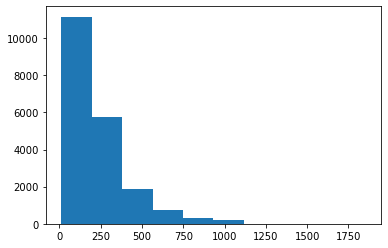

In [6]:
import matplotlib.pyplot as plt
plt.hist(l)
plt.show()

In [7]:
np.median(l)  # 중간값 출력

178.0

In [8]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

s_t_x = pad_sequences(t_x, maxlen = 100)  # 텍스트 앞 부분을 보통 자름(리뷰 앞부분은 보통 본인의 소개거나 비교에 필요없는 내용이기 때문)

In [9]:
s_t_x.shape

(20000, 100)

In [10]:
s_v_x = pad_sequences(v_x, maxlen = 100)

In [11]:
from tensorflow import keras

m = keras.Sequential()

In [12]:
m.add(keras.layers.SimpleRNN(8, input_shape = (100, 500)))  # 단어길이는 100개, 단어 종류는 500개
m.add(keras.layers.Dense(1, activation = 'sigmoid'))

In [13]:
t_h0 = keras.utils.to_categorical(s_t_x)  # 원-핫 인코딩

In [14]:
t_h0.shape

(20000, 100, 500)

In [15]:
v_h0 = keras.utils.to_categorical(s_v_x)

In [16]:
m.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 8)                 4072      
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 4,081
Trainable params: 4,081
Non-trainable params: 0
_________________________________________________________________


In [17]:
ot = keras.optimizers.RMSprop(learning_rate = 1e-4)
m.compile(optimizer = ot, loss = 'binary_crossentropy', metrics = 'accuracy')
ck_p = keras.callbacks.ModelCheckpoint('best_ex2m.h5', save_best_only = True)
e_st = keras.callbacks.EarlyStopping(patience = 3, restore_best_weights = True)
hy = m.fit(t_h0, t_y, epochs = 100, batch_size = 64, validation_data = (v_h0, v_y), callbacks = [ck_p, e_st])

Epoch 1/100
313/313 [==============================] - 10s 27ms/step - loss: 0.7020 - accuracy: 0.4993 - val_loss: 0.6986 - val_accuracy: 0.5012
Epoch 2/100
313/313 [==============================] - 8s 25ms/step - loss: 0.6967 - accuracy: 0.5087 - val_loss: 0.6950 - val_accuracy: 0.5166
Epoch 3/100
313/313 [==============================] - 10s 33ms/step - loss: 0.6929 - accuracy: 0.5206 - val_loss: 0.6924 - val_accuracy: 0.5238
Epoch 4/100
313/313 [==============================] - 10s 32ms/step - loss: 0.6895 - accuracy: 0.5346 - val_loss: 0.6899 - val_accuracy: 0.5314
Epoch 5/100
313/313 [==============================] - 8s 25ms/step - loss: 0.6863 - accuracy: 0.5462 - val_loss: 0.6876 - val_accuracy: 0.5450
Epoch 6/100
313/313 [==============================] - 9s 28ms/step - loss: 0.6829 - accuracy: 0.5578 - val_loss: 0.6847 - val_accuracy: 0.5532
Epoch 7/100
313/313 [==============================] - 10s 31ms/step - loss: 0.6789 - accuracy: 0.5720 - val_loss: 0.6813 - val_accur

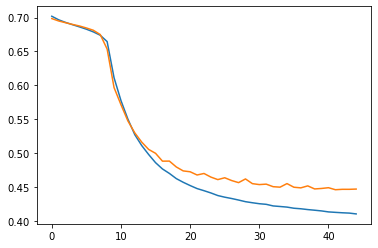

In [18]:
plt.plot(hy.history['loss'])
plt.plot(hy.history['val_loss'])
plt.show()

In [19]:
m1 = keras.Sequential()
m1.add(keras.layers.Embedding(500, 16, input_length = 100))  # 단어 임배딩
m1.add(keras.layers.SimpleRNN(8))
m1.add(keras.layers.Dense(1, activation = 'sigmoid'))

ot = keras.optimizers.RMSprop(learning_rate = 1e-4)
m1.compile(optimizer = ot, loss = 'binary_crossentropy', metrics = 'accuracy')
ck_p = keras.callbacks.ModelCheckpoint('best_ex2_emd_m.h5', save_best_only = True)
e_st = keras.callbacks.EarlyStopping(patience = 3, restore_best_weights = True)
hy1 = m1.fit(s_t_x, t_y, epochs = 100, batch_size = 64, validation_data = (s_v_x, v_y), callbacks = [ck_p, e_st])

Epoch 1/100
313/313 [==============================] - 4s 11ms/step - loss: 0.6966 - accuracy: 0.5095 - val_loss: 0.6953 - val_accuracy: 0.5044
Epoch 2/100
313/313 [==============================] - 3s 11ms/step - loss: 0.6909 - accuracy: 0.5315 - val_loss: 0.6924 - val_accuracy: 0.5166
Epoch 3/100
313/313 [==============================] - 4s 12ms/step - loss: 0.6865 - accuracy: 0.5514 - val_loss: 0.6896 - val_accuracy: 0.5266
Epoch 4/100
313/313 [==============================] - 3s 11ms/step - loss: 0.6820 - accuracy: 0.5687 - val_loss: 0.6872 - val_accuracy: 0.5418
Epoch 5/100
313/313 [==============================] - 3s 11ms/step - loss: 0.6773 - accuracy: 0.5843 - val_loss: 0.6846 - val_accuracy: 0.5464
Epoch 6/100
313/313 [==============================] - 4s 11ms/step - loss: 0.6725 - accuracy: 0.5945 - val_loss: 0.6823 - val_accuracy: 0.5518
Epoch 7/100
313/313 [==============================] - 4s 11ms/step - loss: 0.6676 - accuracy: 0.6059 - val_loss: 0.6800 - val_accuracy:

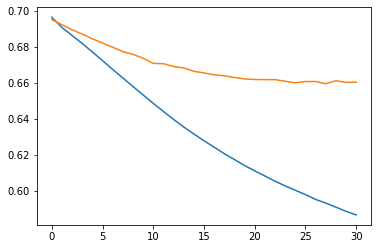

In [20]:
plt.plot(hy1.history['loss'])
plt.plot(hy1.history['val_loss'])
plt.show()

In [21]:
(x_data, y_data), (tt_x, tt_y) = load_data(num_words = 500)
t_x, v_x, t_y, v_y = train_test_split(x_data, y_data, test_size = 0.2, random_state = 42)

In [22]:
s_t_x = pad_sequences(t_x, maxlen = 100)
s_v_x = pad_sequences(v_x, maxlen = 100)

In [23]:
m2 = keras.Sequential()
m2.add(keras.layers.Embedding(500, 16, input_length = 100))
m2.add(keras.layers.LSTM(8, dropout = 0.3))  # LSTM 사용
m2.add(keras.layers.Dense(1, activation = 'sigmoid'))

ot = keras.optimizers.RMSprop(learning_rate = 1e-4)
m2.compile(optimizer = ot, loss = 'binary_crossentropy', metrics = 'accuracy')
ck_p = keras.callbacks.ModelCheckpoint('best_ex2_LSTM_m.h5', save_best_only = True)
e_st = keras.callbacks.EarlyStopping(patience = 3, restore_best_weights = True)
hy2 = m2.fit(s_t_x, t_y, epochs = 100, batch_size = 64, validation_data = (s_v_x, v_y), callbacks = [ck_p, e_st])

Epoch 1/100
313/313 [==============================] - 9s 22ms/step - loss: 0.6926 - accuracy: 0.5274 - val_loss: 0.6918 - val_accuracy: 0.5906
Epoch 2/100
313/313 [==============================] - 7s 21ms/step - loss: 0.6907 - accuracy: 0.5907 - val_loss: 0.6894 - val_accuracy: 0.6188
Epoch 3/100
313/313 [==============================] - 7s 21ms/step - loss: 0.6866 - accuracy: 0.6246 - val_loss: 0.6833 - val_accuracy: 0.6504
Epoch 4/100
313/313 [==============================] - 7s 22ms/step - loss: 0.6741 - accuracy: 0.6613 - val_loss: 0.6610 - val_accuracy: 0.6656
Epoch 5/100
313/313 [==============================] - 7s 21ms/step - loss: 0.6203 - accuracy: 0.6943 - val_loss: 0.5910 - val_accuracy: 0.7208
Epoch 6/100
313/313 [==============================] - 7s 22ms/step - loss: 0.5728 - accuracy: 0.7303 - val_loss: 0.5619 - val_accuracy: 0.7420
Epoch 7/100
313/313 [==============================] - 7s 22ms/step - loss: 0.5469 - accuracy: 0.7473 - val_loss: 0.5372 - val_accuracy:

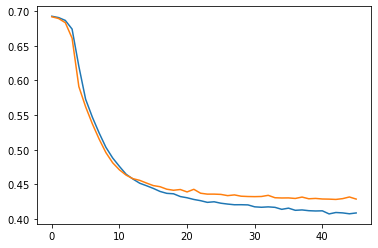

In [24]:
plt.plot(hy2.history['loss'])
plt.plot(hy2.history['val_loss'])
plt.show()

In [25]:
m3 = keras.Sequential()
m3.add(keras.layers.Embedding(500, 16, input_length = 100))
m3.add(keras.layers.LSTM(8, dropout = 0.3, return_sequences = True))
m3.add(keras.layers.LSTM(8, dropout = 0.3))
m3.add(keras.layers.Dense(1, activation = 'sigmoid'))

In [26]:
m4 = keras.Sequential()
m4.add(keras.layers.Embedding(500, 16, input_length = 100))
m4.add(keras.layers.GRU(8, dropout = 0.3, return_sequences = True))
m4.add(keras.layers.GRU(8, dropout = 0.3))
m4.add(keras.layers.Dense(1, activation = 'sigmoid'))